In [1]:
# Si richiede di verificare le dimensioni del dataset e i relativi metadati
# Importo Pandas e collego il mio file csv su notebook in modo da poterci lavorare, per vedere le dimentinsioni utulizzerò lo shape e vedrò il numero di righe e colonne
# per trovare i metadati del file invece utlizzo un info

import pandas as pd

file_path= "C:owid-covid-data.csv"
dataset = pd.read_csv(file_path)
df = dataset
print (f"il dataset ha {df.shape[0]} righe e {df.shape[1]} colonne" "\n")

print ( "I relativi metadati del datase sono:","\n")
df.info()

il dataset ha 429435 righe e 67 colonne

I relativi metadati del datase sono: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  flo

In [2]:
# Si chiede di trovare, per ogni continente: 
#a. il numero di casi fin dall'inizio della pandemia 
#b. la percentuale rispetto al totale mondiale del numero di casi


# Totale dei casi al mondo
tot = df.groupby("continent")["new_cases"].sum().sum() # utlizzo questa formula poiche usando df["new_cases"].sum() mi verrebbero considerati dei valori NaN
print (f"I casi di covid in tutto il mondo sono {tot}")

# calcolo il totale dei casi per ogni continente

grouped = df.groupby("continent")["new_cases"].sum()
for continent,new_cases in grouped.items():
    print(f"casi di covid per il continente {continent}: sono {new_cases} con {round((new_cases/tot)*100,2)}% rispetto al totale mondiale")

I casi di covid in tutto il mondo sono 775935057.0
casi di covid per il continente Africa: sono 13146831.0 con 1.69% rispetto al totale mondiale
casi di covid per il continente Asia: sono 301564180.0 con 38.86% rispetto al totale mondiale
casi di covid per il continente Europe: sono 252916868.0 con 32.6% rispetto al totale mondiale
casi di covid per il continente North America: sono 124492698.0 con 16.04% rispetto al totale mondiale
casi di covid per il continente Oceania: sono 15003468.0 con 1.93% rispetto al totale mondiale
casi di covid per il continente South America: sono 68811012.0 con 8.87% rispetto al totale mondiale


In [ ]:
# Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati: 
#a. l'evoluzione del casi totali dall'inizio alla fine dell'anno 
#b. il numero di nuovi casi rispetto alla data 
#k. poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni

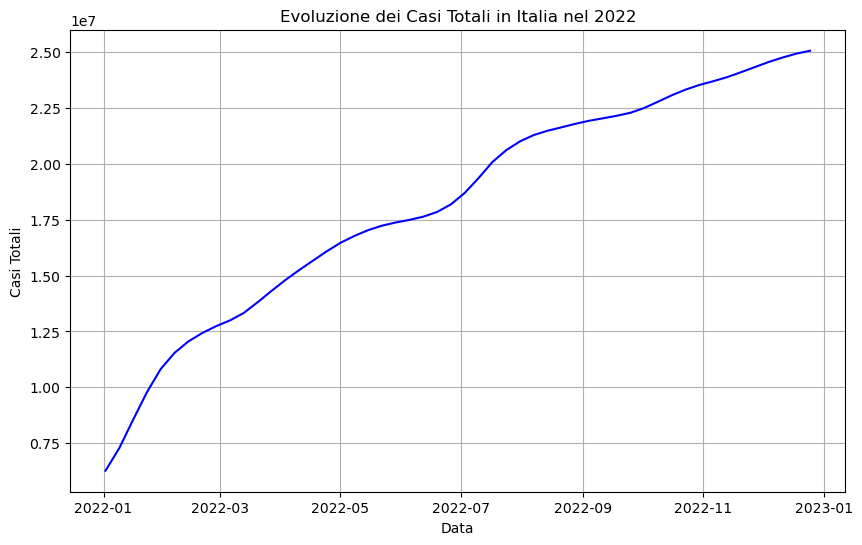

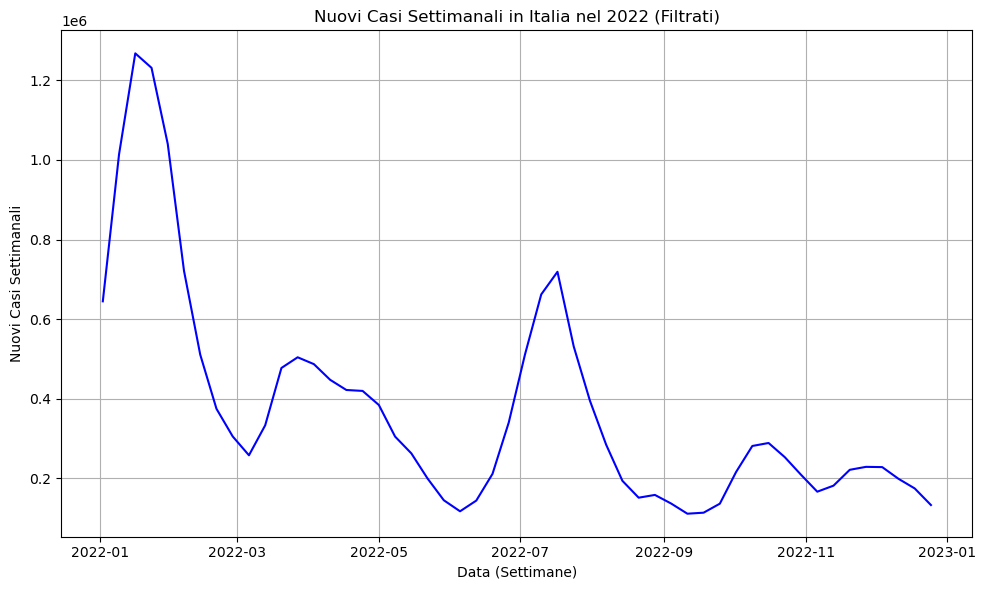

In [3]:
# a. Filtrare i dati per l'Italia nel 2022
df['date'] = pd.to_datetime(df['date'])
df_italy_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022) & (df['new_cases'] > 0)]


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_italy_2022['date'], df_italy_2022['total_cases'], color='b')
plt.title('Evoluzione dei Casi Totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.grid(True)
plt.show()

# b. Raggruppo i dati per settimana (usando la settimana come riferimento)
df_italy_2022.set_index('date', inplace=True)
df_weekly = df_italy_2022['new_cases'].resample('W').sum()

# Rimuovo le righe con valori NaN
df_weekly_clean = df_weekly.dropna()

# Creare il grafico per i nuovi casi settimanali
plt.figure(figsize=(10, 6))
plt.plot(df_weekly_clean.index, df_weekly_clean, color='b')
plt.title('Nuovi Casi Settimanali in Italia nel 2022 (Filtrati)')
plt.xlabel('Data (Settimane)')
plt.ylabel('Nuovi Casi Settimanali')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo 
# il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)
#a. scrivere un breve commento a riguardo

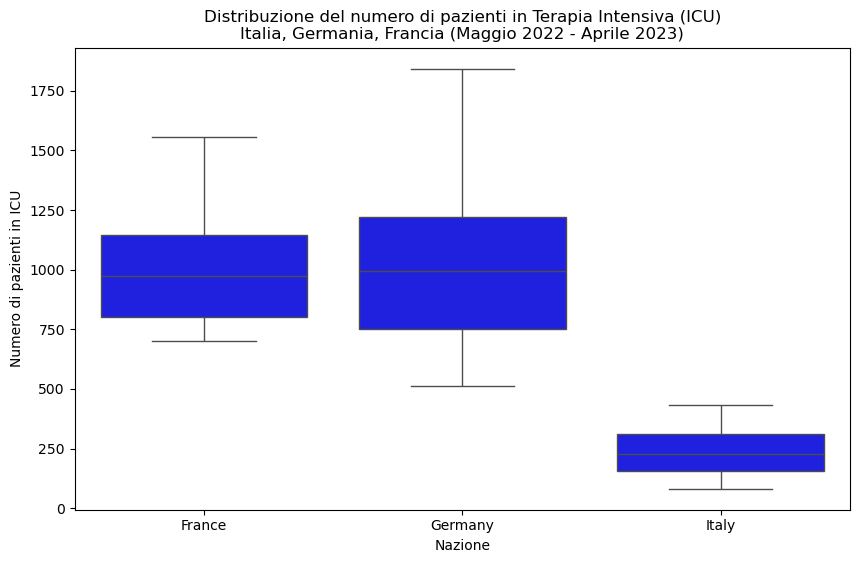

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


# Filtro i dati per le nazioni interessate e per il periodo da maggio 2022 ad aprile 2023
df_filtered = df[(df['location'].isin(['Italy', 'Germany', 'France'])) & 
                 (df['date'] >= '2022-05-01') & 
                 (df['date'] <= '2023-04-30')]

# Seleziono solo le colonne necessarie (data, paese e pazienti in ICU)
df_filtered = df_filtered[['date', 'location', 'icu_patients']]


df_melted = df_filtered.melt(id_vars=['date', 'location'], value_vars=['icu_patients'],
                              var_name='Variabile', value_name='Numero_pazienti_ICU')

# Creazione del boxplot 
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='Numero_pazienti_ICU', data=df_melted, color='b')
plt.title('Distribuzione del numero di pazienti in Terapia Intensiva (ICU)\nItalia, Germania, Francia (Maggio 2022 - Aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti in ICU')
plt.show()

In [ ]:
# Commento
#Francia: La mediana è intorno ai 1000 pazienti, con un intervallo interquartile che va da circa 750 a 1250 pazienti. I valori estremi vanno da circa 500 a 1500 pazienti.

# Germania: La mediana è simile, intorno ai 1000 pazienti, ma con un intervallo interquartile più ampio, che va da circa 500 a 1500 pazienti.
# I valori estremi vanno da circa 250 a 1750 pazienti.

# Francia e Germania: Hanno mediane simili, ma la Germania mostra una maggiore variabilità nei dati.

# Italia: La mediana è significativamente più bassa, intorno ai 250 pazienti,indicando un numero costantemente inferiore di pazienti in terapia intensiva rispetto a Francia e Germania.
# l'intervallo interquartile  va da circa 200 a 300 pazienti ed i valori estremi vanno da circa 150 a 350 pazienti.


In [ ]:
#Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023: 
#a. mostrare la somma dei pazienti ospitalizzati per ognuna
#b. se ci sono dati nulli con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

In [6]:
paesi = ['Italy', 'Germany', 'France', 'Spain']
df_2023 = df[(df['location'].isin(paesi)) & (df['date'].dt.year == 2023)]

# Somma dei pazienti ospedalizzati per ogni paese
hospitalized_sum = df_2023.groupby('location')['hosp_patients'].sum()

risultato = hospitalized_sum.to_frame(name="Pazienti")
risultato

,Pazienti
location,
France,1382574.0
Germany,0.0
Italy,1175272.0
Spain,354602.0
